In [30]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [32]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [33]:
chdir = True

In [34]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [35]:
from IPython.display import IFrame
IFrame("../assets/testbed.pdf", width=600, height=420)

In [36]:
# Metadata for specific SFC configurations

exp_ls = "combined_global"

exp_rs = "exp-4-1-1"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

# Load stimulus experiments

## High-level KPIs:


In [54]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/combined.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data = data.drop('latency', axis=1)
data.info()
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 0 to 178
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1790 non-null   float64
 1   output_rate                         1790 non-null   float64
 2   firewall_instructions               1790 non-null   float64
 3   nf_router_instructions              1789 non-null   float64
 4   ndpi_stats_instructions             1789 non-null   float64
 5   payload_scan_instructions           1790 non-null   float64
 6   bridge_instructions                 1789 non-null   float64
 7   firewall_branches                   1790 non-null   float64
 8   nf_router_branches                  1789 non-null   float64
 9   ndpi_stats_branches                 1789 non-null   float64
 10  payload_scan_branches               1790 non-null   float64
 11  bridge_branches                     1789 non

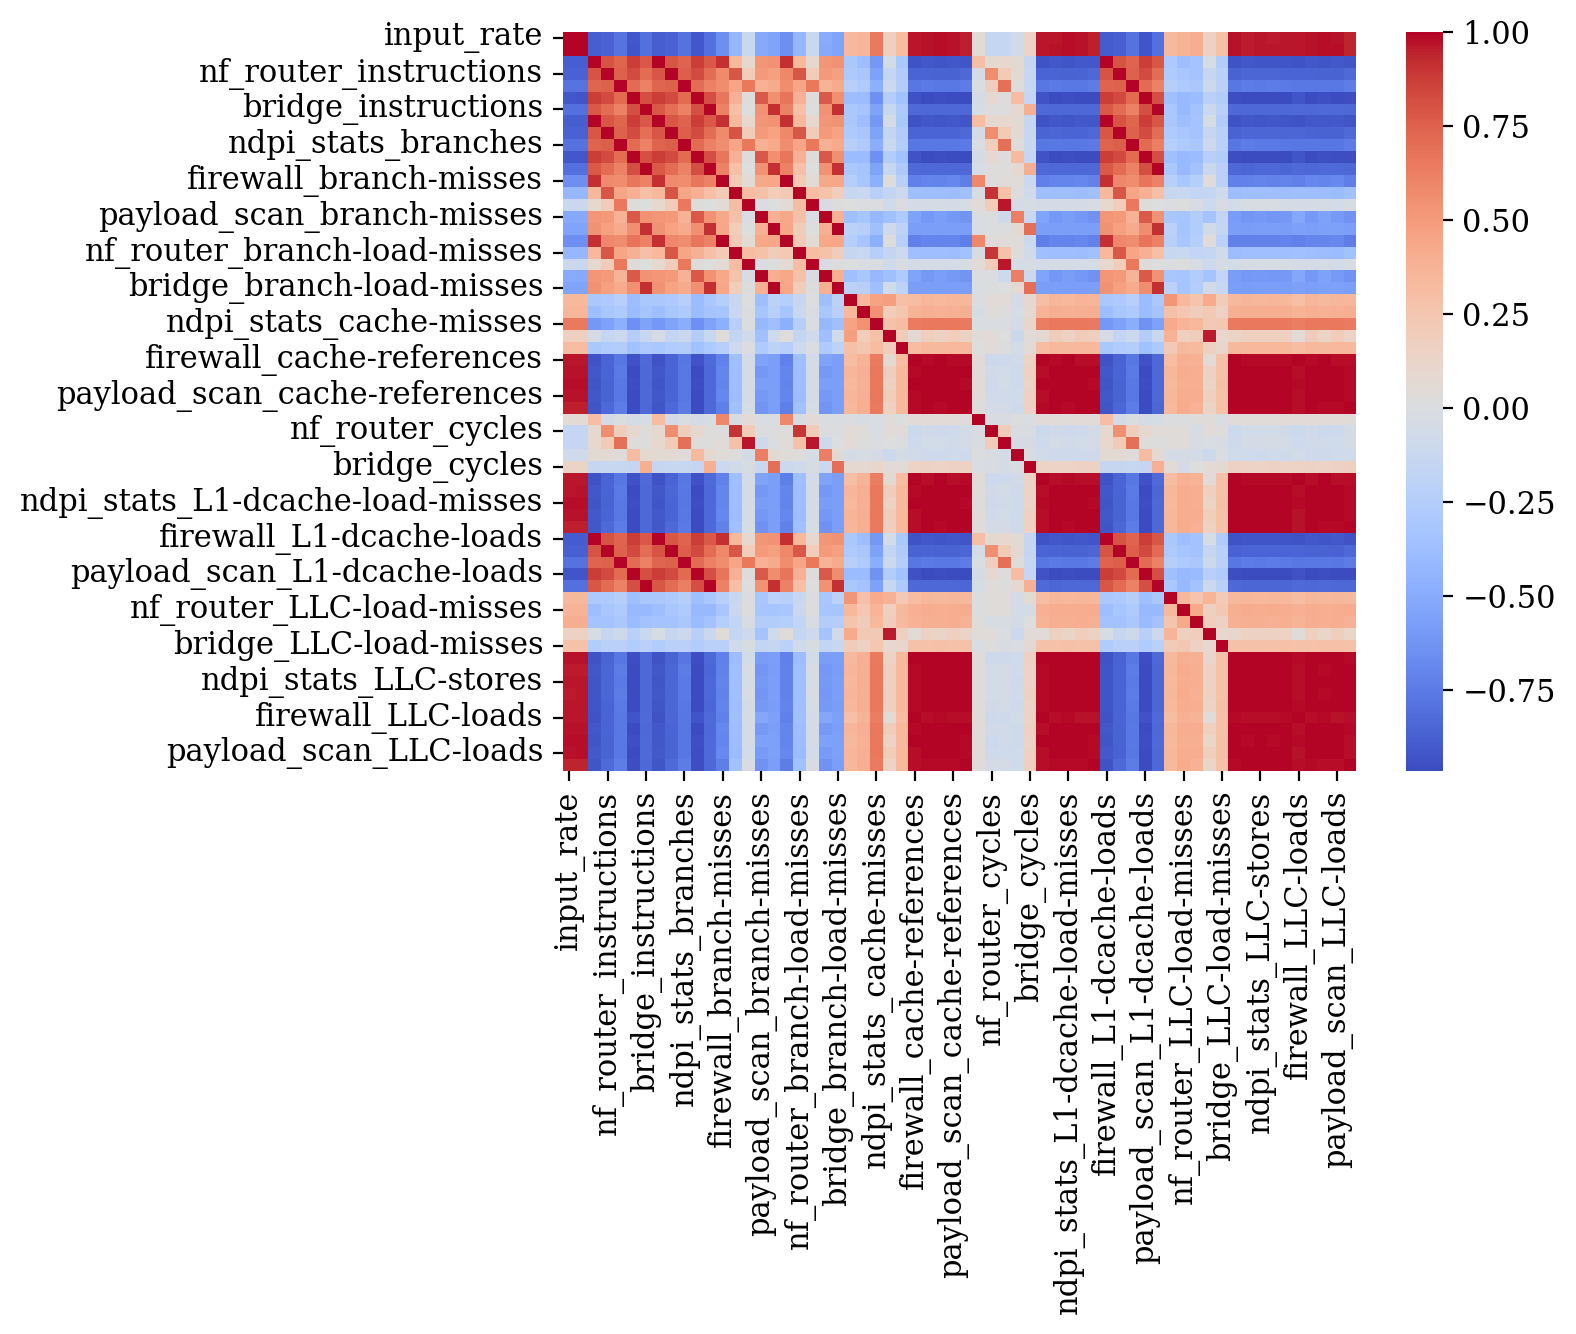

In [55]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.savefig('heatmap_ls_random_rate.png')
plt.show()

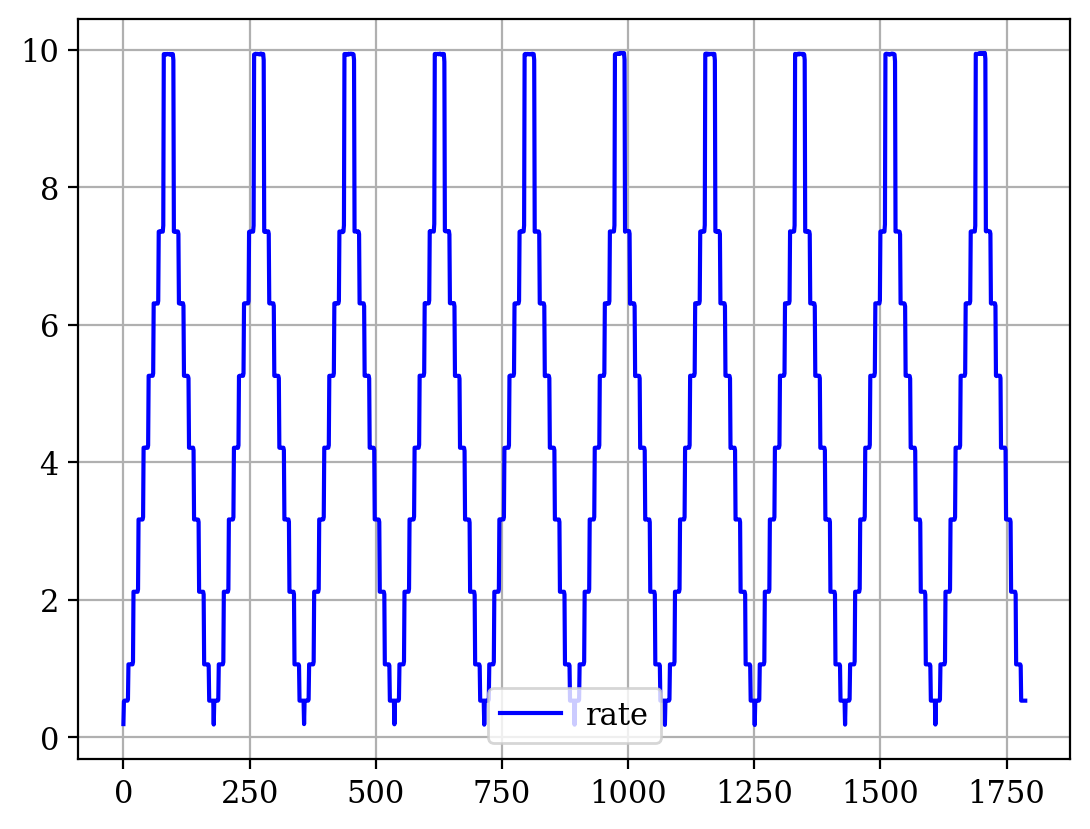

4.461117028172448
0.17473317378476
9.9540057916325


In [56]:
# input rate distribution
a = list(df['input_rate']/1000)
plt.plot(a[0:5000], c='b', label='rate')
plt.legend()
plt.grid()
plt.show()
print(sum(a)/len(a))
print(min(a))
print(max(a))

# principal component analysis

2364432
(38136, 2)


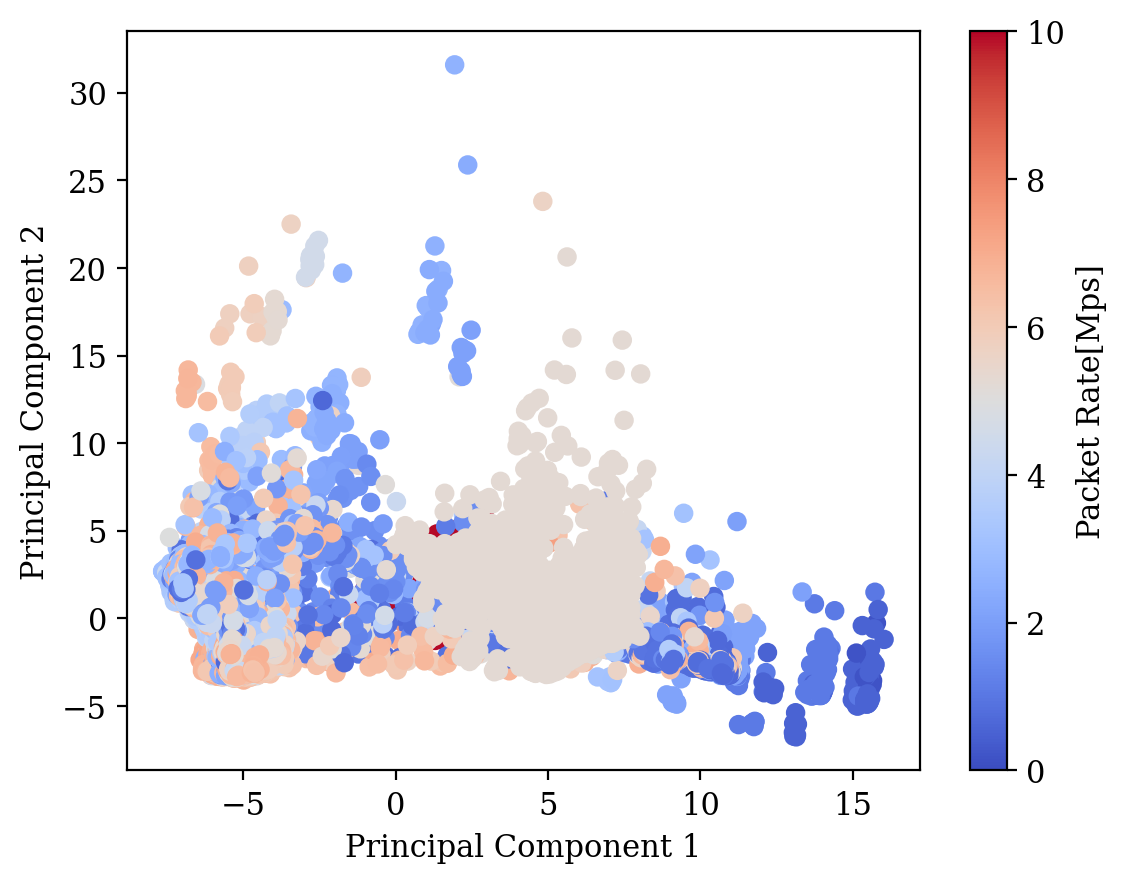

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data into a Pandas dataframe

df = pd.read_csv("combined_global.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the target column from the other columns
target_col = 'input_rate'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))
# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'pca_random_rate.png')
plt.savefig(file_path)
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
c=np.dot(pca.components_[0],pca.components_[1])
#print("Eigenvectors:\n", np.round(pca.components_, 1))
#print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))
#print(c)


dependent_variable:9.9540057916325
2364432
(38136, 2)


Text(0, 0.5, 'Principal Component 2')

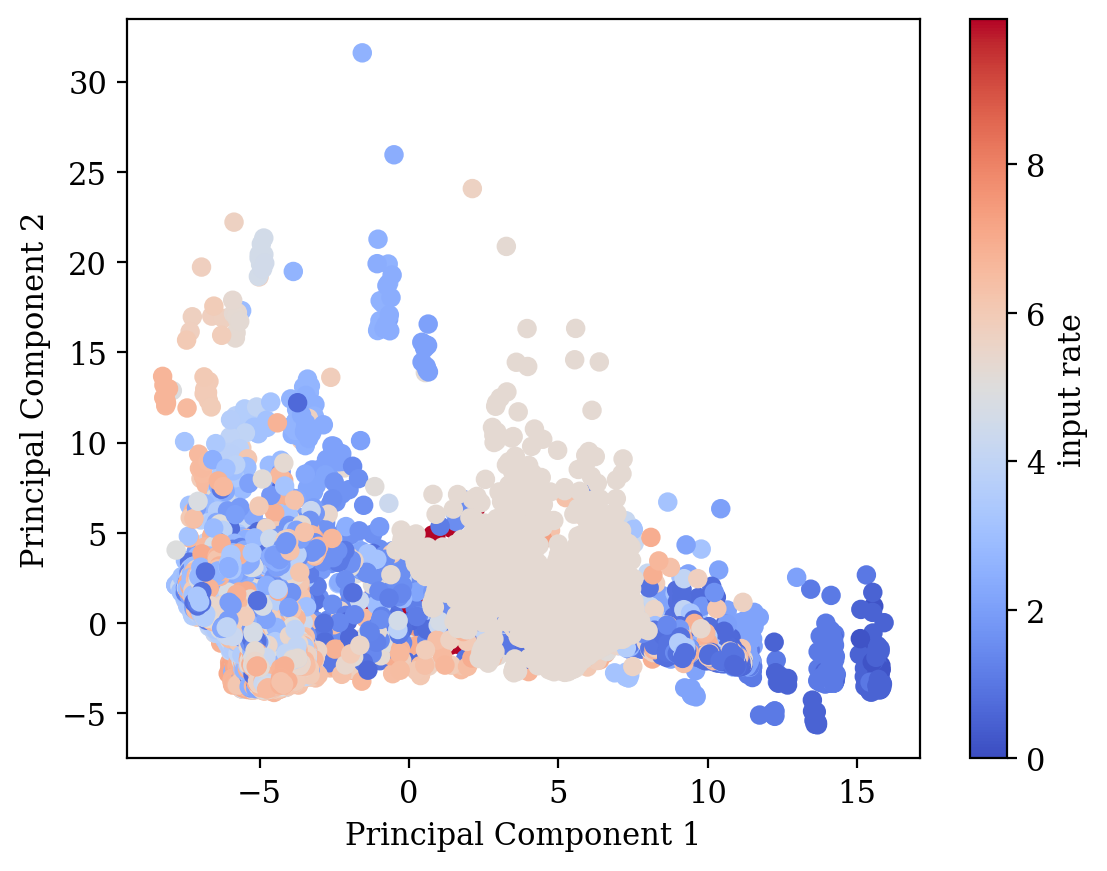

In [14]:
#spca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler



# Load CSV data into a Pandas dataframe
df = pd.read_csv("combined_global.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the target column from the other columns
target_col = 'input_rate'
#target_col = 'latency'
independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)


print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA

# Create a Sparse PCA object with 2 components
spca = SparsePCA(n_components=2, alpha =1)


# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)

independent_variables_pca = spca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=max(df[target_col].div(1000)))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
#print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('input rate')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
#folder_path = 'figures/fixed_rate'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'spca_random_rate.png')
#plt.savefig(file_path)
#plt.show()




dependent_variable:15000.0
5.878
15000.0
2364432
(38136, 2)


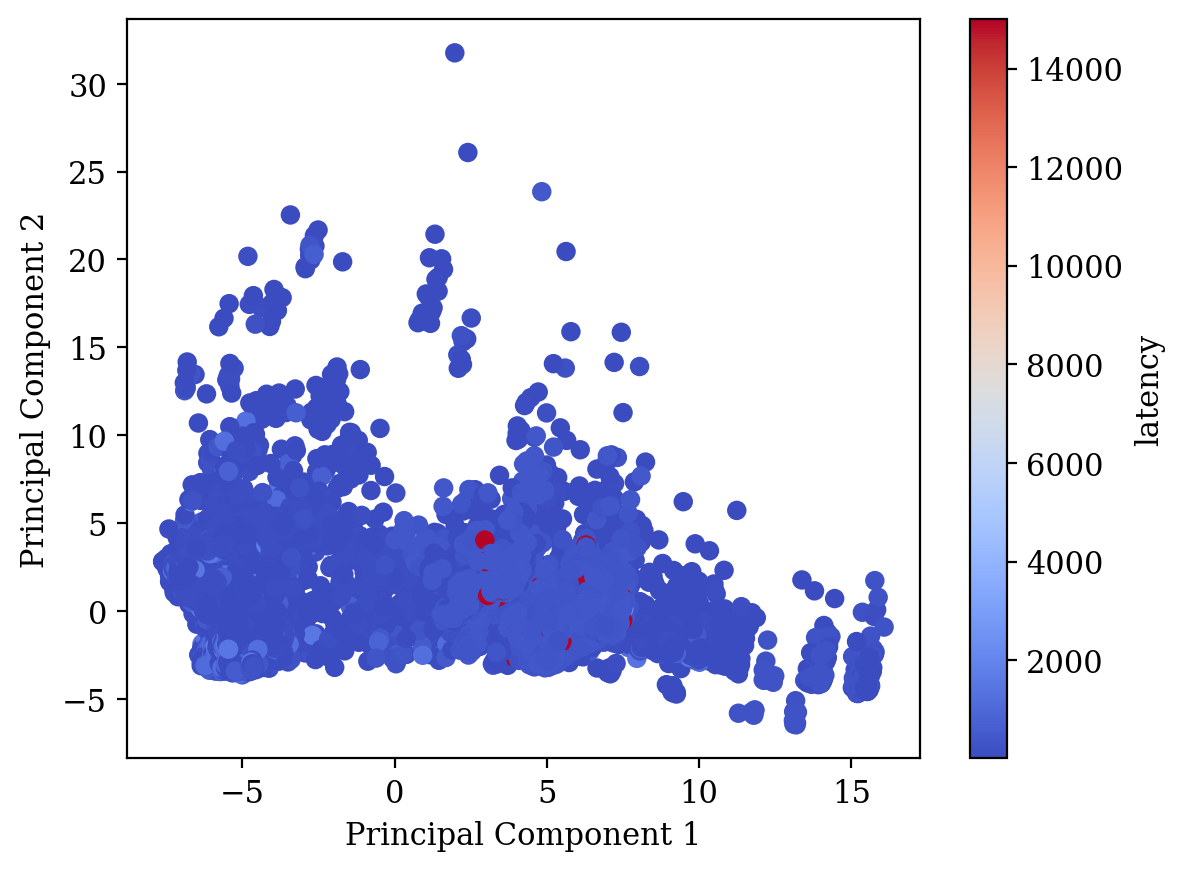

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data 
df = pd.read_csv("combined_global.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the target column from the other columns
target_col = 'latency'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]


print(f'dependent_variable:{max(dependent_variable)}')

print(min(df[target_col]))
print(max(df[target_col]))

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components = 2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))

# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label(target_col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()

# Decision tree

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [115]:
# Read the CSV file
df = pd.read_csv("combined.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']



# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)
# Train the regressor on the training set
reg.fit(X_train, y_train)




DecisionTreeRegressor(random_state=0)

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)


# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate the percentage of predictions within 5% threshold




In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error



# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]

# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
   # distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
   # accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
   # accuracy_partical_cdf.append(accuracy_within_threshold_partial)
print(accuracy_cdf)



Accuracy within 5% threshold: 81.56424581005587
[0.0, 81.56424581005587, 86.40595903165735, 91.06145251396647, 93.85474860335195, 96.2756052141527, 96.2756052141527, 96.46182495344506, 96.46182495344506, 96.46182495344506, 99.62756052141528]


In [132]:
# predict dataset 'dag'
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.utils import shuffle

# Read the CSV file
path = '../Dag/dag-1/datasets/load_stimulus_exp4.csv'
#path = '../Dag/dag-1/datasets/load_stimulus_freq_exp.csv'
path = '../linear/resource_stimulus/resource_stimulus_exp37.csv'
df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X_test = df.drop(['input_rate', 'output_rate'], axis=1)
y_test1 = df['input_rate']
y_test=y_test1.values


# Shuffle the data
#X_test, y_test = shuffle(X_test, y_test)

# Standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
y_pred=np.array(y_pred)
#y_pred = [item for subset in y_pred for item in subset]
#y_test_new=y_test.values
#print(y_test.types)
print(y_pred)


[1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.67649753 1036.67649753 1036.67649753 1036.67649753 1036.67649753
 1036.

C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


accurancy with thoreshold 5%:10.614525139664805
[0.0, 11.1731843575419, 11.1731843575419, 11.1731843575419, 11.1731843575419, 11.1731843575419, 22.3463687150838, 33.5195530726257, 44.6927374301676, 89.94413407821229, 98.88268156424581]


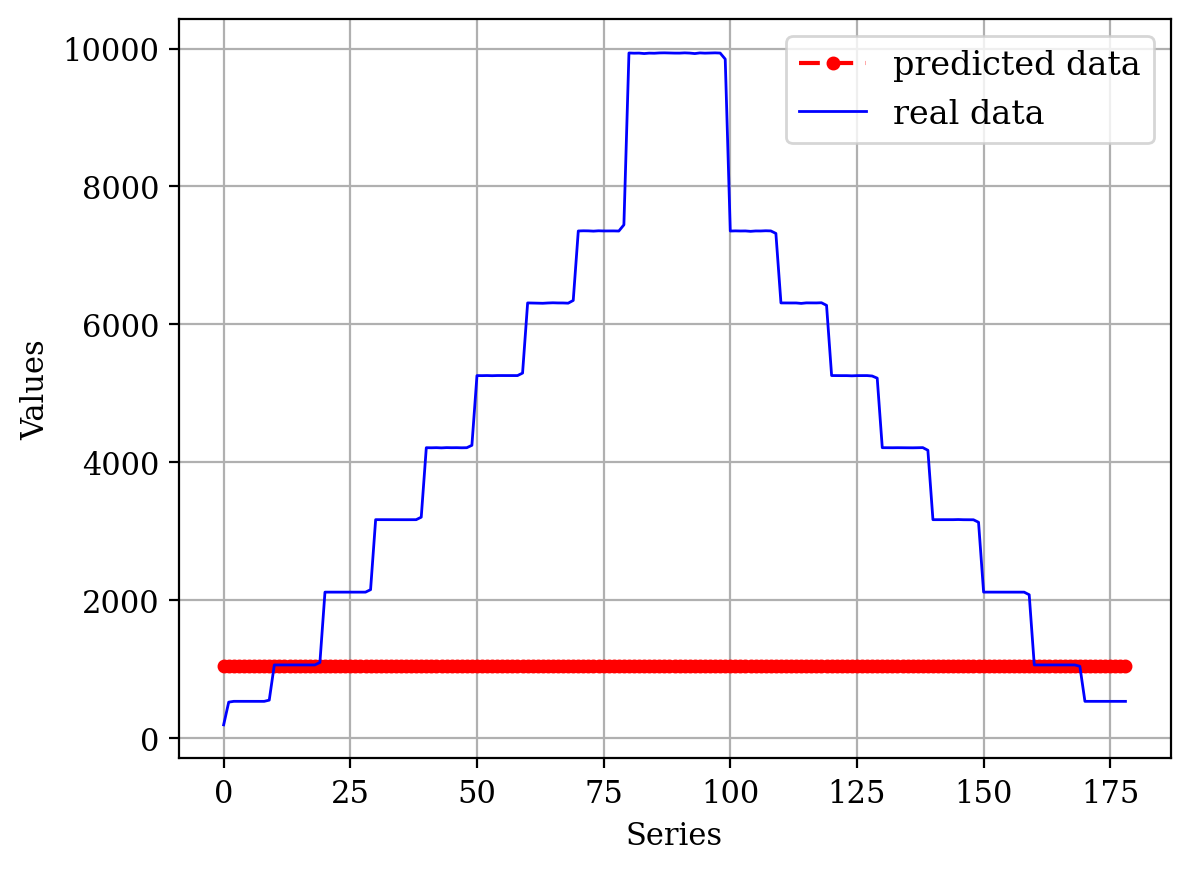

In [133]:

distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')


plt.plot(y_pred, marker='o',c='r',markersize = 4, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=12)
plt.grid()

# Print the accuracy within the threshold
#print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# Several ML algorithm to predict rate

In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [174]:
# Read the CSV file
df = pd.read_csv("combined.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()
# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

# Create a linear regression model
model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = SVR(kernel='linear')
# Train the model
reg = model.fit(X_train, y_train)



In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)


Accuracy within 5% threshold: 75.97765363128491
[0.0, 82.86778398510242, 91.06145251396647, 94.41340782122904, 97.02048417132217, 98.88268156424581, 99.06890130353817, 99.4413407821229, 99.4413407821229, 99.4413407821229, 99.81378026070763]


In [178]:
# predict dataset 'dag'
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.utils import shuffle

# Read the CSV file
path = '../Dag/dag-1/datasets/load_stimulus_exp4.csv'
path = '../Dag/dag-1/datasets/load_stimulus_freq_exp.csv'
#path = '../linear/resource_stimulus/resource_stimulus_exp37.csv'
df = pd.read_csv(path, index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X_test = df.drop(['input_rate', 'output_rate'], axis=1)
y_test1 = df['input_rate']
y_test=y_test1.values


# Shuffle the data
#X_test, y_test = shuffle(X_test, y_test)

# Standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
y_pred=np.array(y_pred)


C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


accurancy with thoreshold 5%:100.0
[0.0, 0.0, 0.11123470522803114, 11.012235817575084, 11.234705228031146, 11.234705228031146, 22.135706340378196, 33.14794215795328, 44.493882091212456, 88.87652947719688, 100.0]


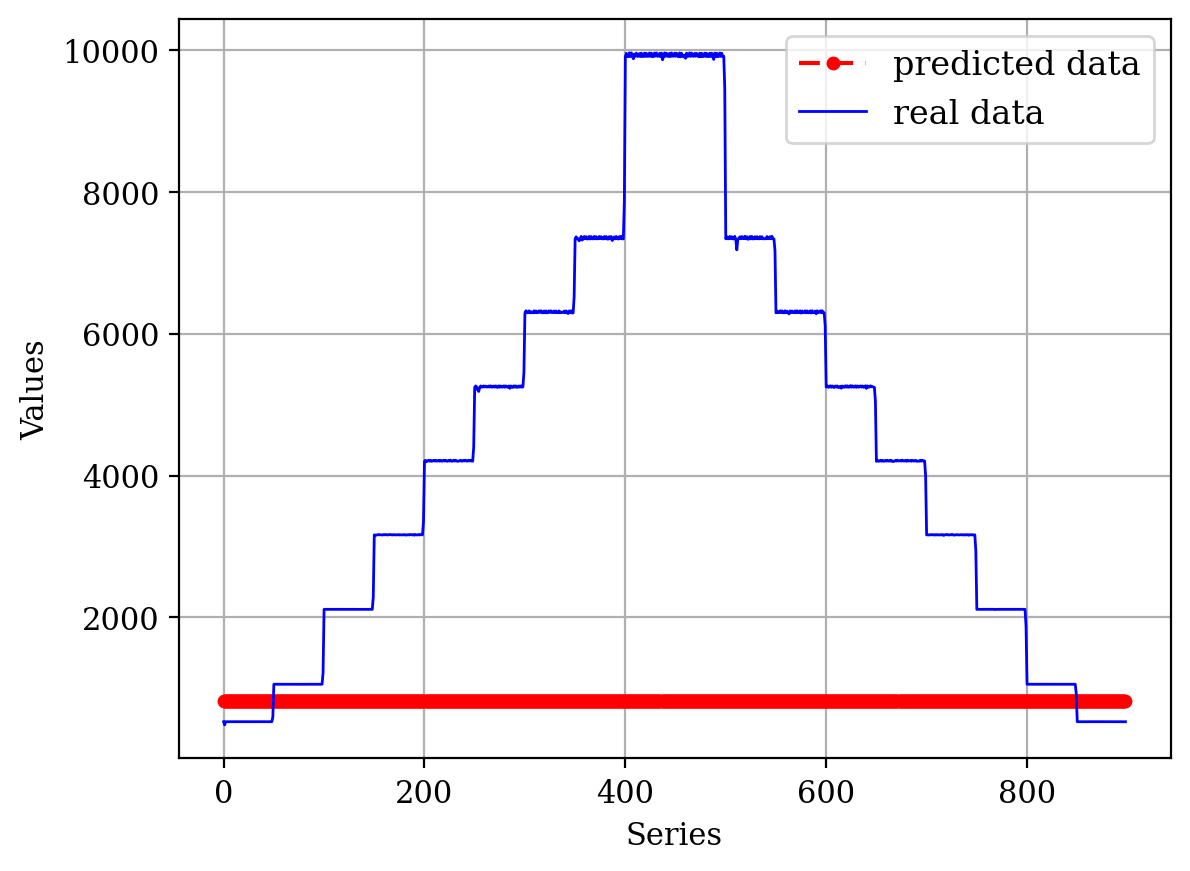

In [180]:

distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')


plt.plot(y_pred, marker='o',c='r',markersize = 4, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=12)
plt.savefig('corss-ml.png')
plt.grid()

# Print the accuracy within the threshold
#print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# Nural network to predict rate

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error


In [182]:
# Read the CSV file
df = pd.read_csv("combined_global.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

print(len(y))

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


38136


In [183]:
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [184]:
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)


Epoch 1/100
1907/1907 [==============================] - 3s 2ms/step - loss: 6266152.5000
Epoch 2/100
1907/1907 [==============================] - 3s 1ms/step - loss: 2167520.0000
Epoch 3/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1844178.5000
Epoch 4/100
1907/1907 [==============================] - 4s 2ms/step - loss: 1706471.6250
Epoch 5/100
1907/1907 [==============================] - 4s 2ms/step - loss: 1645871.8750
Epoch 6/100
1907/1907 [==============================] - 4s 2ms/step - loss: 1601150.3750
Epoch 7/100
1907/1907 [==============================] - 4s 2ms/step - loss: 1565376.5000
Epoch 8/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1532637.0000
Epoch 9/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1507548.6250
Epoch 10/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1489359.3750
Epoch 11/100
1907/1907 [==============================] - 3s 1ms/step - loss: 1472535.8750
Epoch 12

1907/1907 [==============================] - 4s 2ms/step - loss: 1212301.0000
Epoch 92/100
1907/1907 [==============================] - 2s 1ms/step - loss: 1211148.0000
Epoch 93/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1209637.0000
Epoch 94/100
1907/1907 [==============================] - 3s 1ms/step - loss: 1209870.3750
Epoch 95/100
1907/1907 [==============================] - 4s 2ms/step - loss: 1208576.6250
Epoch 96/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1207974.5000
Epoch 97/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1207148.7500
Epoch 98/100
1907/1907 [==============================] - 2s 1ms/step - loss: 1205389.0000
Epoch 99/100
1907/1907 [==============================] - 3s 1ms/step - loss: 1207337.2500
Epoch 100/100
1907/1907 [==============================] - 3s 2ms/step - loss: 1205636.5000


239/239 [==============================] - 0s 836us/step
[0.0, 61.43156790770844, 73.79391714735186, 79.82433141059255, 84.24226533822758, 87.3885684320923, 89.4205558468799, 90.88883062401678, 92.05558468799161, 92.82905086523336, 93.47142108023073]


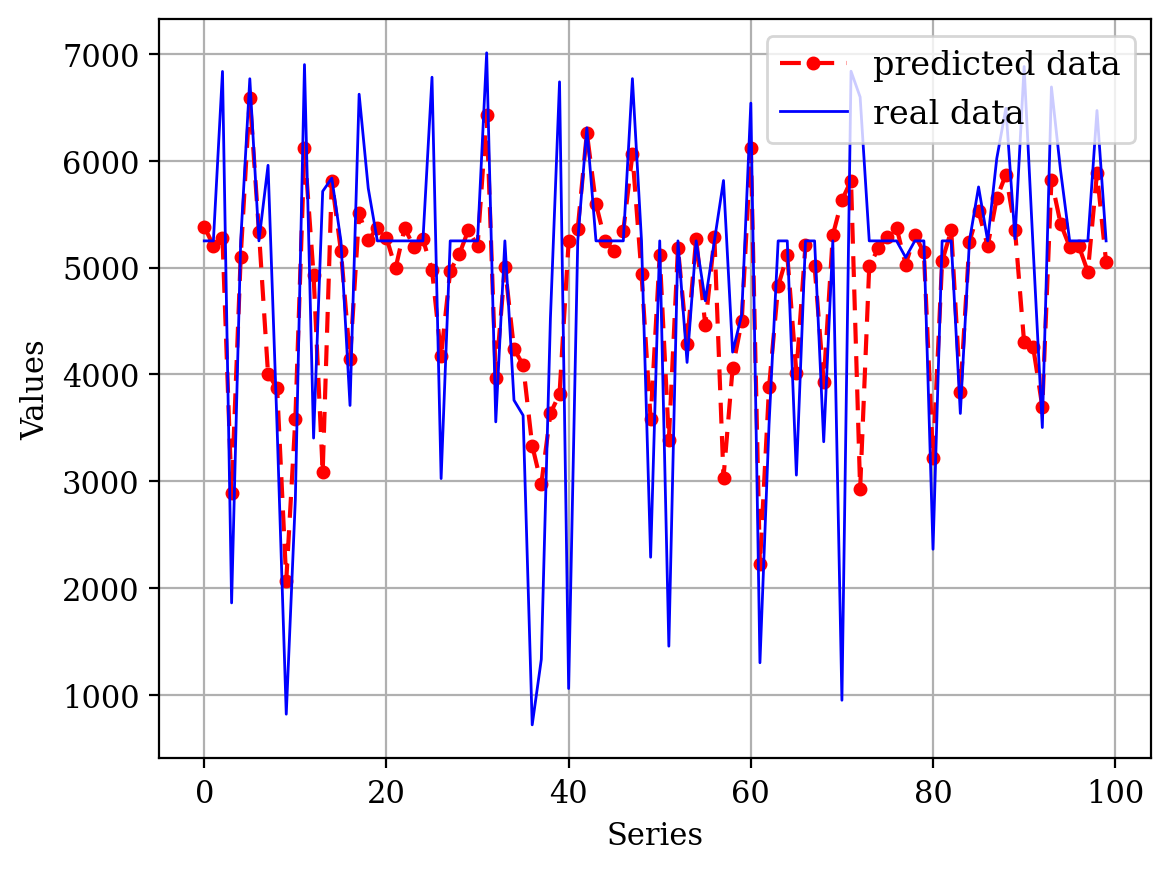

In [185]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)



# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
plt.plot(y_pred[0:100], marker='o',c='r',markersize = 4, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=12)
plt.grid()


# Print the accuracy within the threshold
#print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)


178
6/6 [==============================] - 0s 1ms/step
accurancy with thoreshold 5%:8.426966292134832
[0.0, 13.48314606741573, 20.224719101123593, 25.280898876404496, 34.831460674157306, 52.24719101123596, 63.48314606741573, 65.73033707865169, 67.97752808988764, 68.53932584269663, 69.10112359550563]


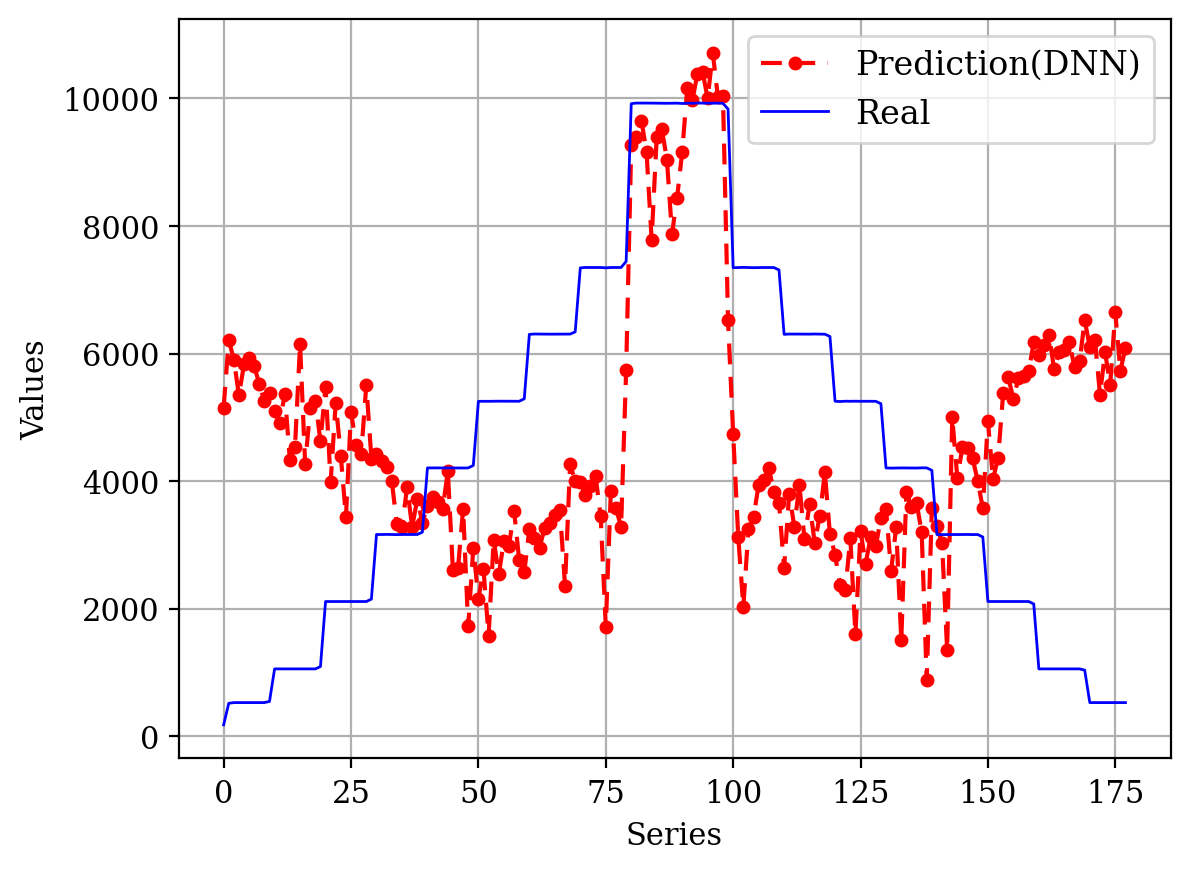

In [189]:
# predict dataset 'dag'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.utils import shuffle

# Read the CSV file
path = '../Dag/dag-1/datasets/load_stimulus_exp4.csv'
#path = '../Dag/dag-1/datasets/load_stimulus_freq_exp.csv'
df = pd.read_csv(path, index_col=0)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()
#df.info()


# Separate the features and target variable
X_test = df.drop(['input_rate', 'output_rate'], axis=1)
y_test = df['input_rate']
#y_test=df['output_rate']
# Shuffle the data
#X_test, y_test = shuffle(X_test, y_test)
print(len(y_test))

# Shuffle the data
#X_test, y_test = shuffle(X_test, y_test)

# Standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)



# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')
#print(y_pred)
#print(y_test)

plt.plot(y_pred, marker='o',c='r',markersize = 4, linestyle='-', dashes=(5, 3),label='Prediction(DNN)')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 1,label='Real')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=12)
plt.savefig('cross_data4.png')
plt.grid()

# Print the accuracy within the threshold
#print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

179
6/6 [==============================] - 0s 801us/step
accurancy with thoreshold 10%:2.2346368715083798
[0.0, 1.1173184357541899, 1.675977653631285, 2.793296089385475, 3.35195530726257, 3.35195530726257, 3.910614525139665, 5.58659217877095, 6.70391061452514, 7.82122905027933, 9.497206703910614]


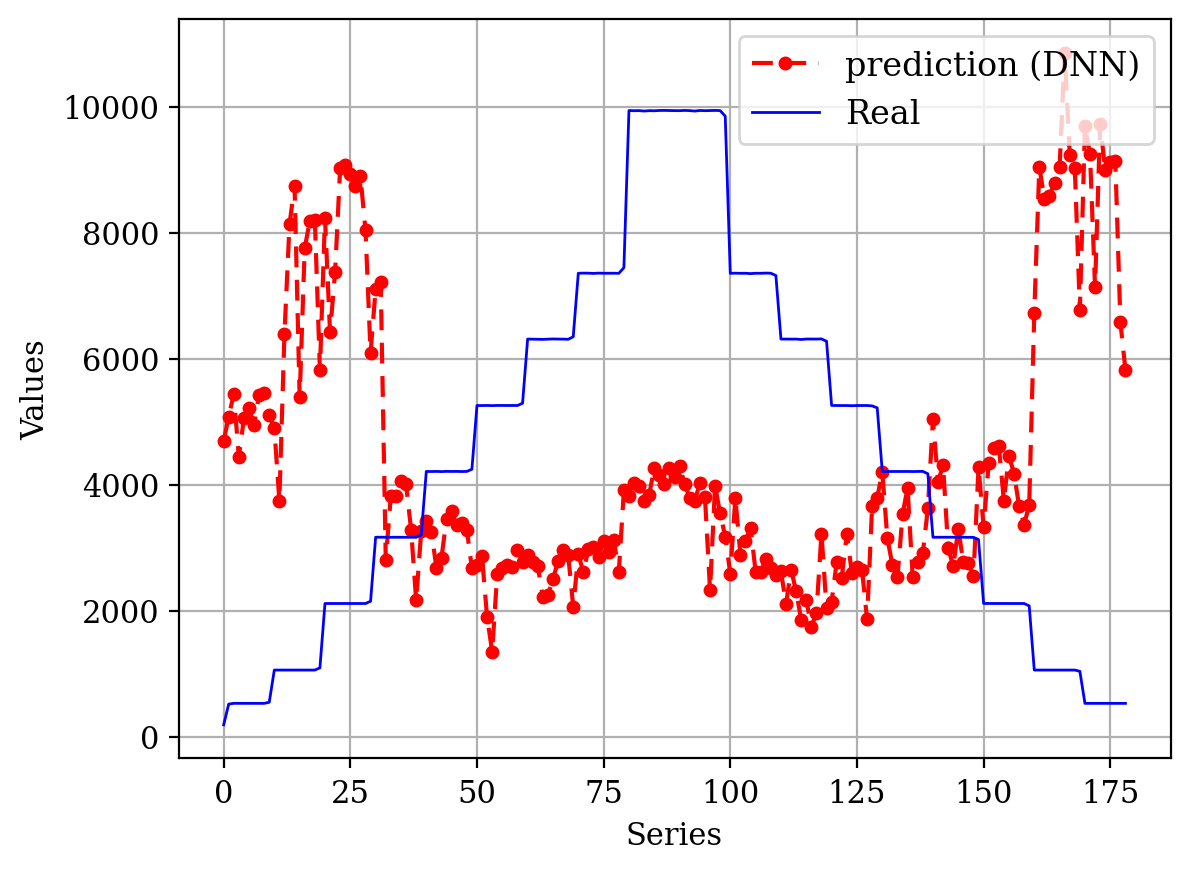

In [188]:
# predict dataset 'resouce stimulus'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.utils import shuffle

# Read the CSV file
path = '../linear/resource_stimulus/resource_stimulus_exp37.csv'
df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X_test = df.drop(['input_rate', 'output_rate'], axis=1)
y_test = df['input_rate']

print(len(y_test))

# Shuffle the data
#X_test, y_test = shuffle(X_test, y_test)

# Standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)



# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 10%:{accuracy_within_threshold}')

plt.plot(y_pred, marker='o',c='r',markersize = 4, linestyle='-', dashes=(5, 3),label='prediction (DNN)')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 1,label='Real')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=12)
plt.savefig('cross_test3.png')
plt.grid()

# Print the accuracy within the threshold
#print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/50
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)